Watermark detected: False
Correlation value: 1.4453619097849453e-05
Watermark detected: True
Correlation value: 0.005031500896178972


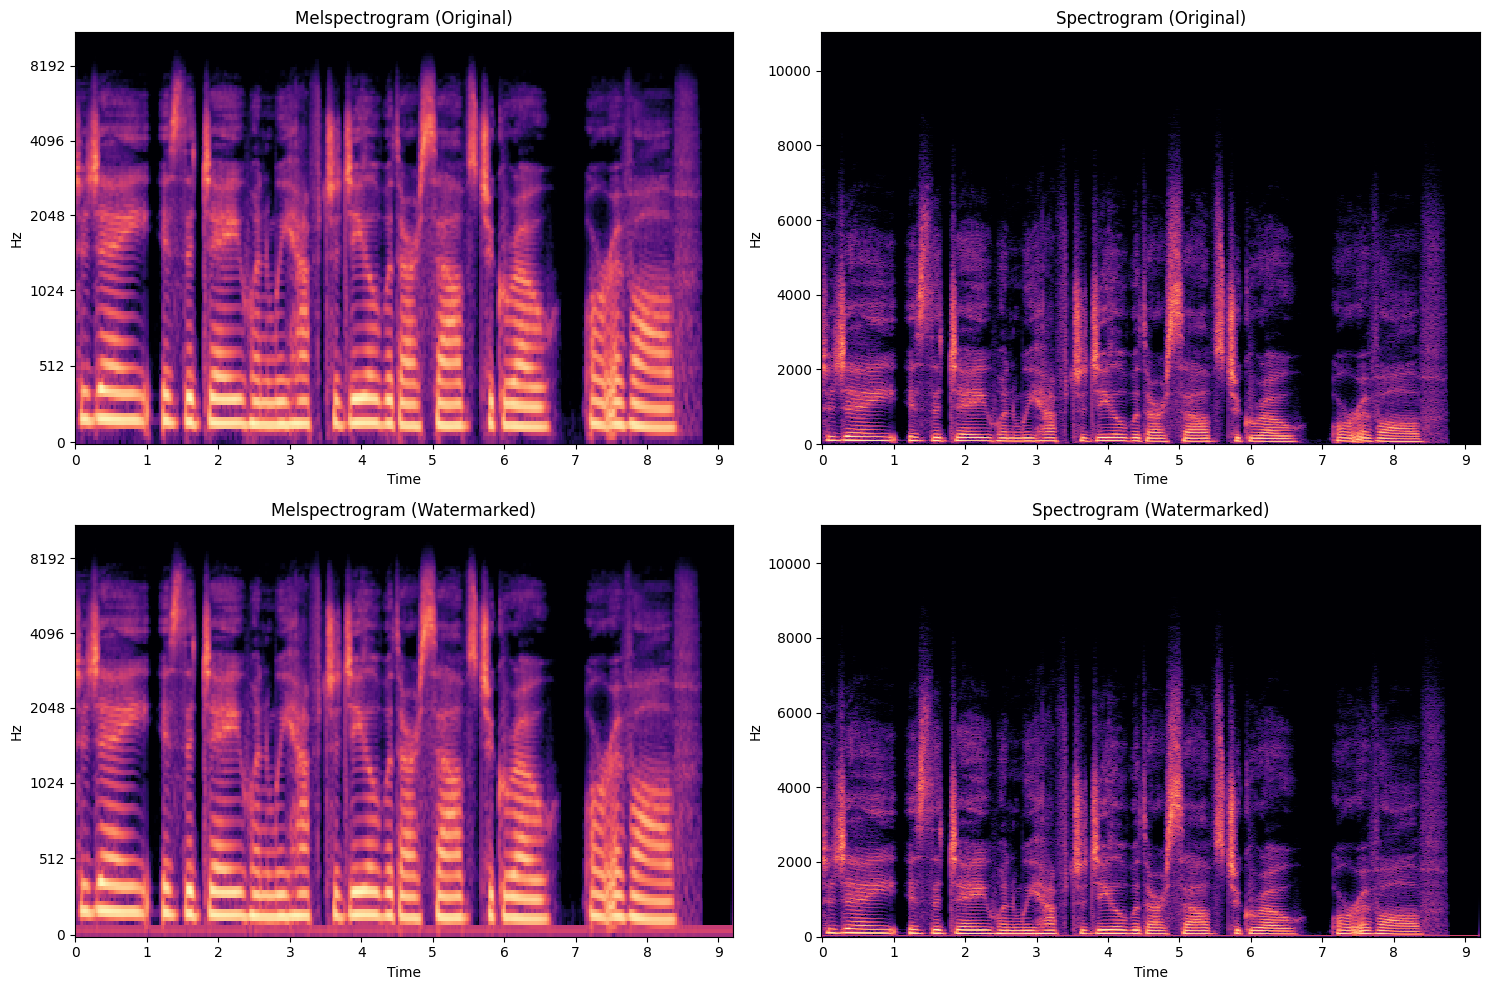

In [1]:
import numpy as np
import soundfile as sf
from scipy.fft import fft, fftfreq
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy import signal

def detect_watermark(audio_data, sr, watermark_freq, threshold=4e-3):
    # Generate the watermark signal
    t = np.arange(len(audio_data)) / sr
    watermark = np.sin(2 * np.pi * watermark_freq * t)
    
    # Normalize both signals
    audio_data = audio_data / np.max(np.abs(audio_data))
    watermark = watermark / np.max(np.abs(watermark))
    
    # Compute cross-correlation
    correlation = signal.correlate(audio_data, watermark, mode='valid')
    
    # Normalize correlation
    correlation = correlation / len(audio_data)
    
    # Check if the maximum correlation exceeds the threshold
    max_correlation = np.max(np.abs(correlation))
    
    return max_correlation > threshold, max_correlation




watermark_freq = 71



audio, sr = sf.read("output.wav")

# watermark = np.sin(2 * np.pi * 1000 * np.arange(len(original_audio)) / sr) * 0.01 
is_detected,correlation = detect_watermark(audio, sr, watermark_freq)
print(f"Watermark detected: {is_detected}")
print(f"Correlation value: {correlation}")


watermarked_audio, sr = sf.read("output_watermarked.wav")
# watermark = np.sin(2 * np.pi * 1000 * np.arange(len(original_audio)) / sr) * 0.01 
is_detected,correlation = detect_watermark(watermarked_audio, sr, watermark_freq)
print(f"Watermark detected: {is_detected}")
print(f"Correlation value: {correlation}")



fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Melspectrogram for audio1
S1 = librosa.feature.melspectrogram(y=audio, sr=sr)
librosa.display.specshow(librosa.power_to_db(S1, ref=np.max), y_axis='mel', x_axis='time', ax=axs[0, 0])
axs[0, 0].set_title('Melspectrogram (Original)')

# Spectrogram for audio1
D1 = librosa.stft(audio)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D1), ref=np.max), y_axis='hz', x_axis='time', ax=axs[0, 1])
axs[0, 1].set_title('Spectrogram (Original)')

# Melspectrogram for audio2
S2 = librosa.feature.melspectrogram(y=watermarked_audio, sr=sr)
librosa.display.specshow(librosa.power_to_db(S2, ref=np.max), y_axis='mel', x_axis='time', ax=axs[1, 0])
axs[1, 0].set_title('Melspectrogram (Watermarked)')

# Spectrogram for audio2
D2 = librosa.stft(watermarked_audio)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D2), ref=np.max), y_axis='hz', x_axis='time', ax=axs[1, 1])
axs[1, 1].set_title('Spectrogram (Watermarked)')

plt.tight_layout()
plt.show()